# RandomForestClassifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('A.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,Class,Ph,Turbidity
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1,9.445130,3.875165
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1,9.024845,3.985251
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0,NaN,2.747313
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1,6.800119,3.854940
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1,7.174135,3.939896


In [3]:
df=df.dropna()
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,Class,Ph,Turbidity
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1,9.445130,3.875165
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1,9.024845,3.985251
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1,6.800119,3.854940
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1,7.174135,3.939896
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1,7.657991,2.437296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1,7.368769,3.045612
7992,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1,9.352720,3.045612
7993,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1,9.393148,3.045612
7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1,7.296573,3.045612


In [4]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'Class', 'Ph', 'Turbidity'],
      dtype='object')

In [5]:
x = df.drop(labels='Class', axis=1)
y = df.loc[:,'Class']

In [6]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros =RandomUnderSampler(random_state=42)
x,y=ros.fit_resample(x,y)
print("OUR DATASET COUNT         : ", Counter(y))
print("UNDER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0: 912, 1: 912})
UNDER SAMPLING DATA COUNT  :  Counter({0: 912, 1: 912})


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=20, stratify=y)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  1459
Number of test dataset     :  365
Total number of dataset    :  1824


In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [9]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predicted = RF.predict(x_test)

In [10]:
cr = classification_report(y_test,predicted)
print('Classification report of RandomForestClassifier Result is:\n',cr)
print("\n")

Classification report of RandomForestClassifier Result is:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       182
           1       0.91      0.93      0.92       183

    accuracy                           0.92       365
   macro avg       0.92      0.92      0.92       365
weighted avg       0.92      0.92      0.92       365





In [11]:
cm = confusion_matrix(y_test,predicted)
print('Confusion Matrix result of RandomForestClassifier is:',cm)
print("\n")

Confusion Matrix result of RandomForestClassifier is: [[165  17]
 [ 12 171]]




In [12]:
accuracy = cross_val_score(RF, x, y, scoring='accuracy')
print('Cross validation test results of accuracy:', accuracy)
print("\n")

Cross validation test results of accuracy: [0.93150685 0.94246575 0.94794521 0.81643836 0.52747253]




In [13]:
a = accuracy_score(y_test,predicted)
print("Accuracy Result of RandomForestClassifier is:",a*100)

Accuracy Result of RandomForestClassifier is: 92.05479452054794


Confusion matrix-RandomForestClassifier:
[[165  17]
 [ 12 171]]


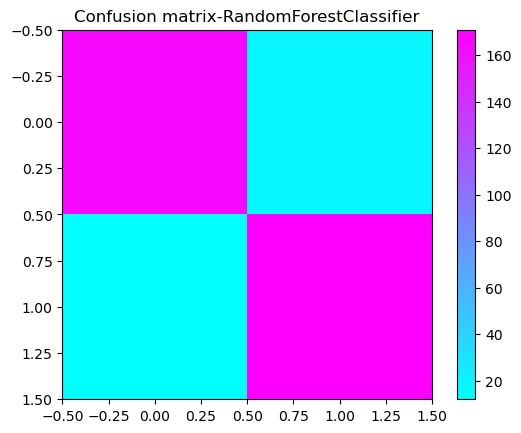

In [14]:
def plot_confusion_matrix(cm, title='Confusion matrix-RandomForestClassifier', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('Confusion matrix-RandomForestClassifier:')
print(cm)
plot_confusion_matrix(cm)

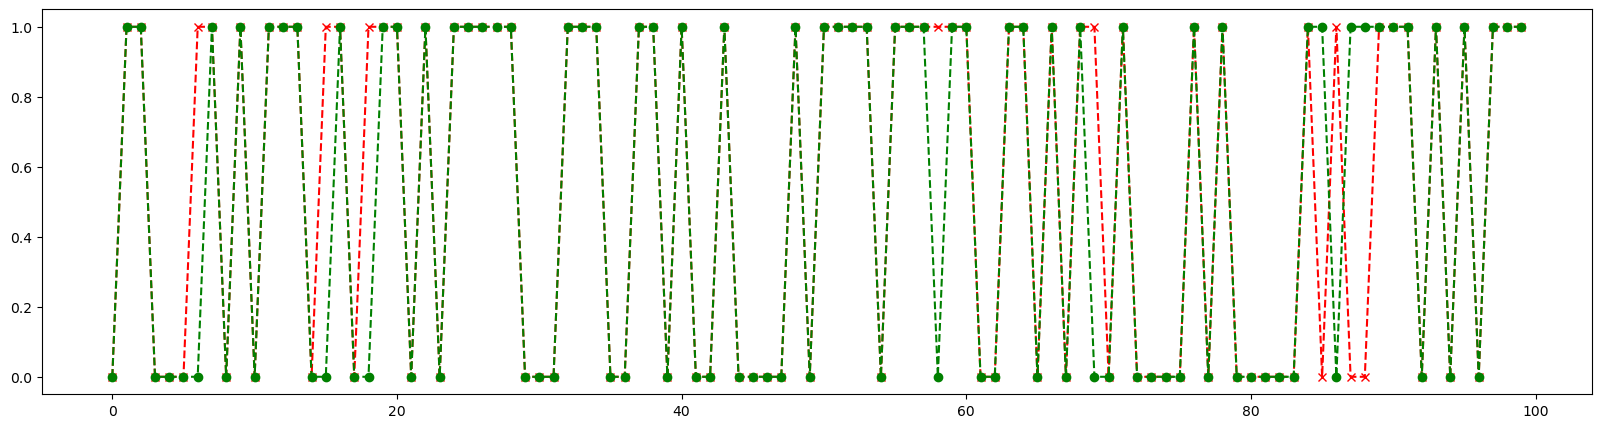

In [15]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()